<a href="https://colab.research.google.com/github/aanchan1/social-network-ads-analysis/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

**Importing the dataset**

In [ ]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**Splitting the dataset into the Training set and Test set**

In [ ]:
X=df.iloc[:,2:4]
print(X.shape)
y=df.iloc[:,-1].values
print(y.shape)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)


(400, 2)
(400,)
(280, 2) (280,) (120, 2) (120,)


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print('X_train',X_train)
print('X_test',X_test)

X_train [[-1.1631724  -1.5849703 ]
 [ 2.17018137  0.93098672]
 [ 0.0133054   1.22017719]
 [ 0.20938504  1.07558195]
 [ 0.40546467 -0.48604654]
 [-0.28081405 -0.31253226]
 [ 0.99370357 -0.8330751 ]
 [ 0.99370357  1.8563962 ]
 [ 0.0133054   1.24909623]
 [-0.86905295  2.26126285]
 [-1.1631724  -1.5849703 ]
 [ 2.17018137 -0.80415605]
 [-1.35925203 -1.46929411]
 [ 0.40546467  2.2901819 ]
 [ 0.79762394  0.75747245]
 [-0.96709276 -0.31253226]
 [ 0.11134522  0.75747245]
 [-0.96709276  0.55503912]
 [ 0.30742485  0.06341534]
 [ 0.69958412 -1.26686079]
 [-0.47689368 -0.0233418 ]
 [-1.7514113   0.3526058 ]
 [-0.67297331  0.12125343]
 [ 0.40546467  0.29476771]
 [-0.28081405  0.06341534]
 [-0.47689368  2.2901819 ]
 [ 0.20938504  0.03449629]
 [ 1.28782302  2.20342476]
 [ 0.79762394  0.26584866]
 [-0.28081405  0.15017248]
 [ 0.0133054  -0.54388463]
 [-0.18277423  0.15017248]
 [-0.08473441  0.23692961]
 [ 0.0133054  -0.25469417]
 [ 2.17018137  1.104501  ]
 [-1.7514113   0.3526058 ]
 [ 1.87606192  0.121

**Fitting SVM to the Training set**

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0,probability=True)
classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

**Predicting the Test set results**

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[75  4]
 [12 29]]
0.8666666666666667


In [ ]:
from sklearn.metrics import precision_score
print("Precision: {0}".format(precision_score(y_test, classifier.predict(X_test))))
from sklearn.metrics import recall_score
print("Recall:", round(recall_score(y_test, classifier.predict(X_test)), 2))
from sklearn.metrics import roc_auc_score,accuracy_score
print('auroc',roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1]))
print("Accuracy:",accuracy_score(y_test, y_pred))

Precision: 0.8787878787878788
Recall: 0.71
auroc 0.9478234022846558
Accuracy: 0.8666666666666667


**Visualising the Training set results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


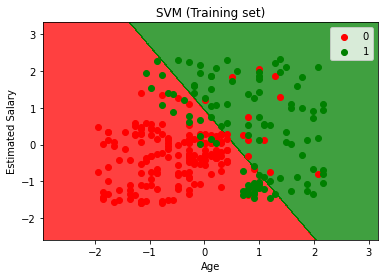

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Visualising the Test set results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


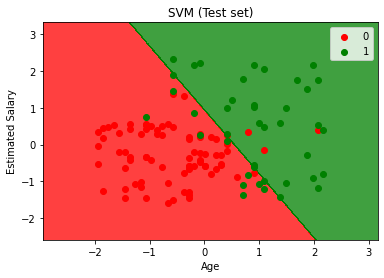

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()